In [ ]:
import sys
import os
import numpy as np
import import_ipynb
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from matplotlib import pyplot as plt

sys.path.append(os.path.abspath(".."))

from src.utils import plot_predictions
import notebooks.model_building as dp

In [10]:
y_test = dp.y_test
y_pred_lr = dp.y_pred_lr
y_pred_rf = dp.y_pred_rf
test_index = dp.test_index
X_train_scaled = dp.X_train_scaled
rf_model = dp.rf_model

In [11]:
# Evaluate and print metrics
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

lr_mse = mean_squared_error(y_test, y_pred_lr)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print("Linear Regression RMSE:", np.sqrt(lr_mse))
print("Random Forest RMSE:", np.sqrt(rf_mse))

Linear Regression MAE: 0.0421841762834603
Random Forest MAE: 0.04406032147915057
Linear Regression R2: 0.9915947838508286
Random Forest R2: 0.9902479426599187
Linear Regression RMSE: 0.06166574790603407
Random Forest RMSE: 0.0664228771037957


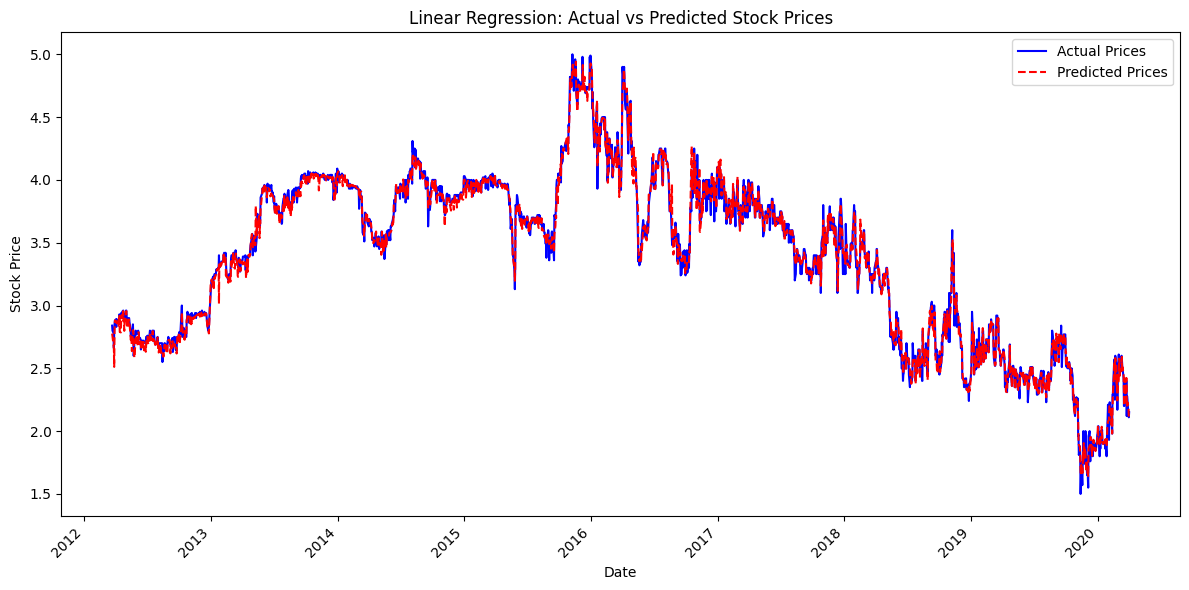

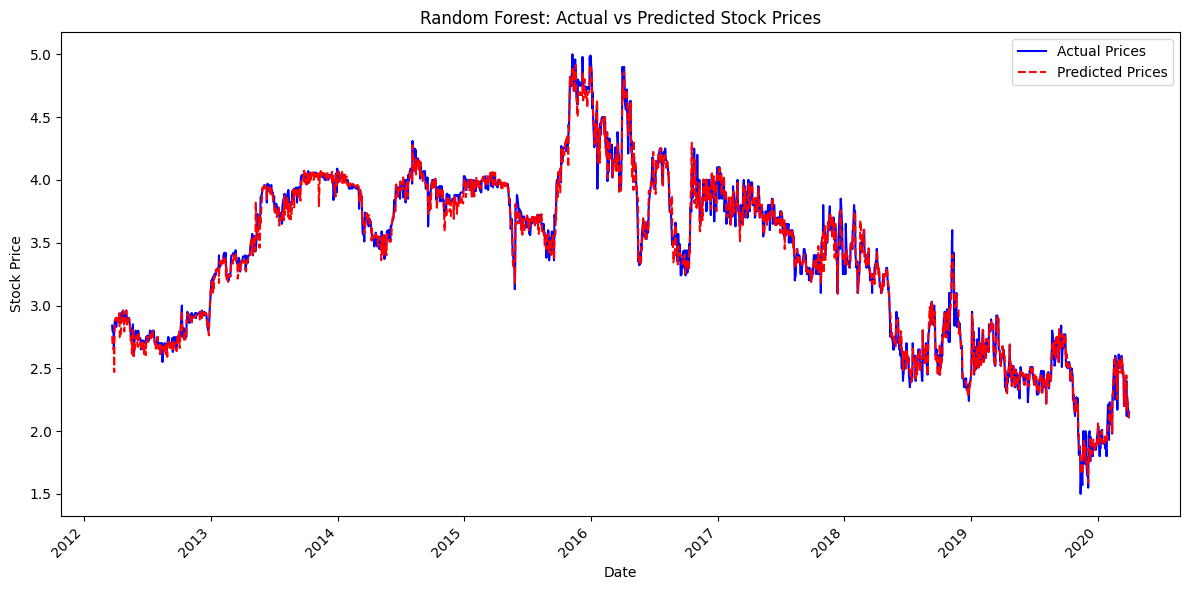

In [12]:
# Plot predictions
plot_predictions(test_index, y_test, y_pred_lr, "Linear Regression: Actual vs Predicted Stock Prices")
plot_predictions(test_index, y_test, y_pred_rf, "Random Forest: Actual vs Predicted Stock Prices")

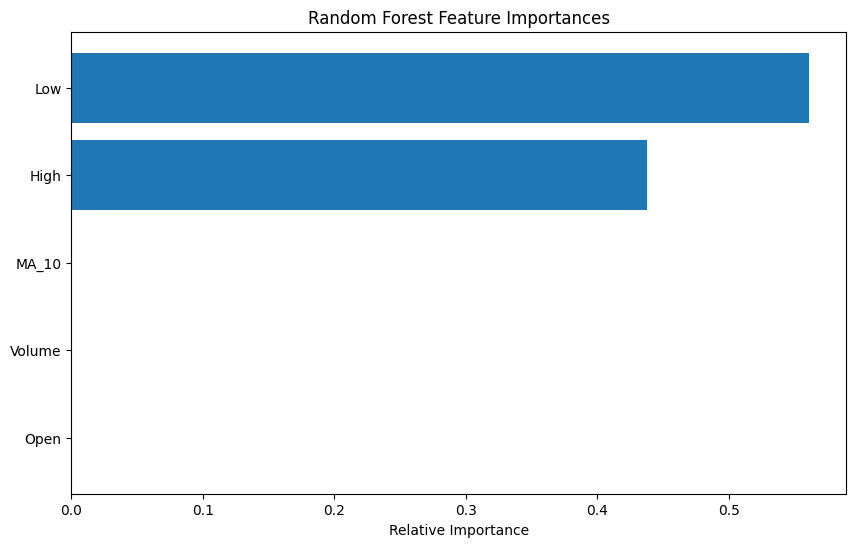

In [ ]:
# Plot feature importances for Random Forest
features = X_train_scaled.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Random Forest Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.close()